## Cara menggunakan

1. Buka link drive berikut: https://drive.google.com/drive/folders/1cD5paKyz6F3C0W8JPUeH-NTPCaKm1PZm
2. Tambahkan shortcut ke drive masing-masing:

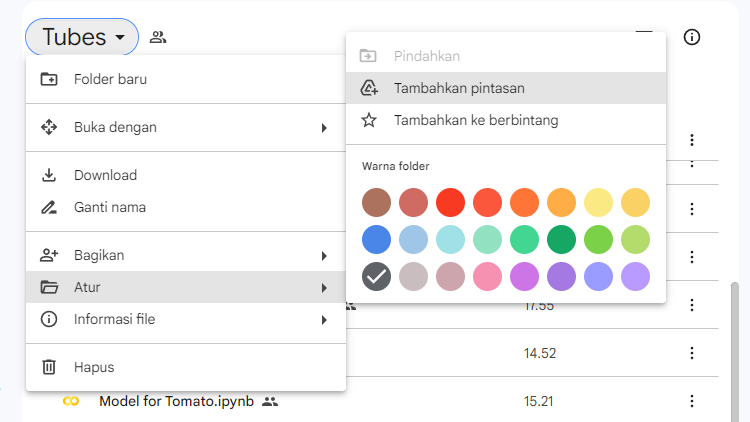
3. Klik dua kali bagian drive saya

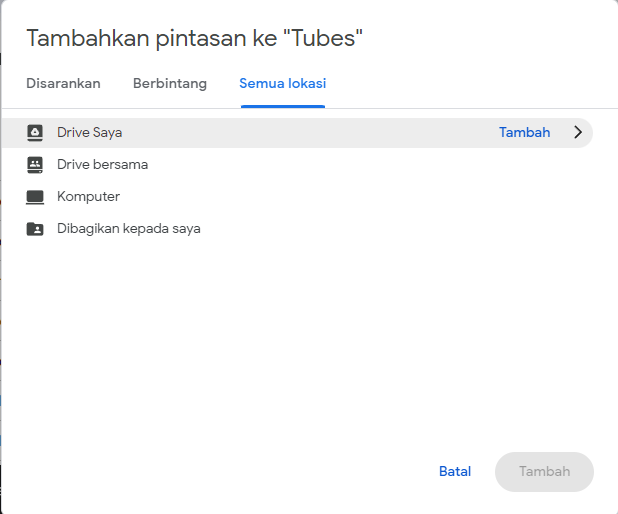
4. Buat folder baru dengan nama "Tutorial" (Tolong abaikan file lainnya :v)

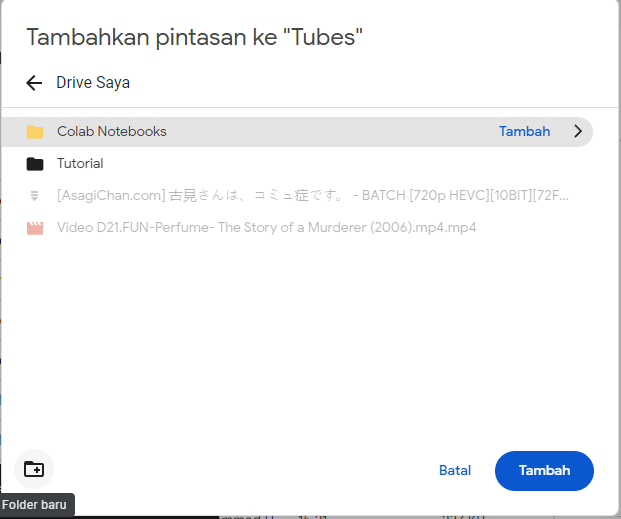
5. Tambahkan ke folder tutorial

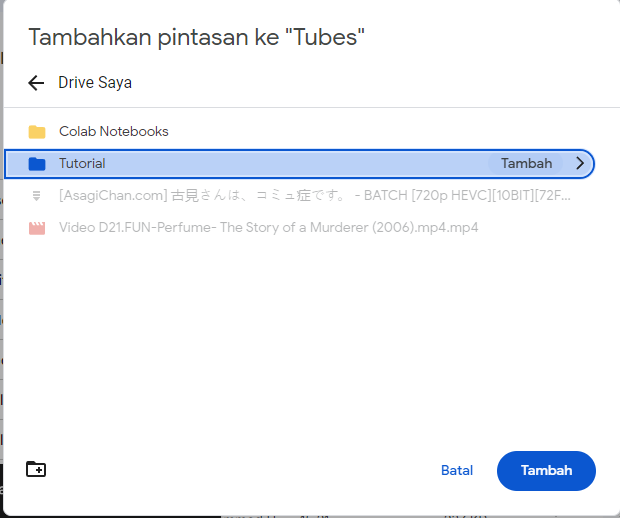

6. Save colab ini ke copy masing" (agar tidak bertabrakan saat dicoba), File -> Save a copy in drive

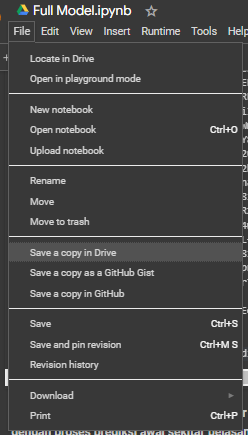
7. Colab baru akan terbuka di tab berikutnya dan jalankan colab tersebut (bukan colab yang ini).

Notes: **Pastikan menggunakan T4 GPU agar melakukan load tidak terlalu lama. Proses load model kurang lebih memakan waktu 10 menitan dengan proses prediksi awal sekitar belasan detik. Proses prediksi untuk image berikutnya kurang dari beberapa detik.**

## Import semua modul dan model yang telah dibuat

In [ ]:
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install bitsandbytes
!pip install sentencepiece
!pip install transformers einops

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

**Input Model Transformer**

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Model**

In [ ]:
plant_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Classification_Model.keras")
plant_class = ['Kamboja', 'Potato', 'Tomato']
kamboja_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Kamboja_Model.keras")
kamboja_class = ["Healthy", "Sick"]
tomato_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Tomato_Model.keras")
tomato_class = ["Early Blight", "Late Blight", "Healthy"]
potato_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Potato_Model.keras")
potato_class = ["Early Blight", "Late Blight", "Healthy"]

## Input image yang ingin diprediksi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving early_bliht1.jpg to early_bliht1 (1).jpg


In [ ]:
file_names = list(uploaded.keys())
file_names[0]

'early_bliht1 (1).jpg'

## Memberikan hasil prediksi


In [ ]:
path = '/content/' + file_names[0]
image = tf.keras.utils.load_img(path, target_size=(256,256))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
np.shape(input_arr)

(1, 256, 256, 3)

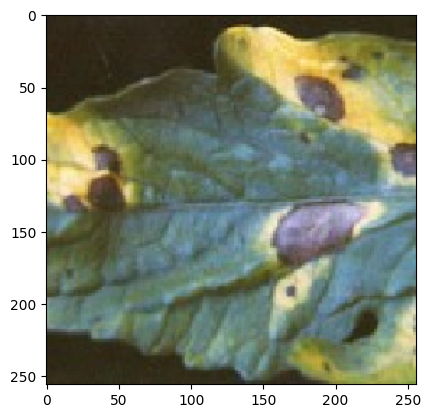

In [ ]:
plt.imshow(image)

In [ ]:
predict_jenis = plant_model.predict(input_arr)
jenis_tanaman = plant_class[np.argmax(predict_jenis)]
if(jenis_tanaman == "Kamboja"):
  predict_penyakit = kamboja_model.predict(input_arr)
  jenis_penyakit = kamboja_class[np.argmax(predict_penyakit)]
elif (jenis_tanaman == "Potato"):
  predict_penyakit = potato_model.predict(input_arr)
  jenis_penyakit = potato_class[np.argmax(predict_penyakit)]
else:
  predict_penyakit = tomato_model.predict(input_arr)
  jenis_penyakit = tomato_class[np.argmax(predict_penyakit)]

print("Prediction Results:")
print("Plant:", jenis_tanaman)
print("Desease:", jenis_penyakit)

1/1 [==============================] - 2s 2s/step
Prediction Results:
Plant: Tomato
Desease: Early Blight


GPT2


In [ ]:
# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, LlamaTokenizer
# import torch


# model_name = "MBZUAI/LaMini-GPT-774M"

# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
# function to fully generate output text
# def generate_text(input_prompt, min_length=1, max_length=500, device='cuda'):
#   input_prompt = f"Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\n{input_prompt}\n\n### Response:"
#   model.to(device)
#   encoded_input = tokenizer(input_prompt, return_tensors='pt').to(device)
#   output = model.generate(**encoded_input, min_length=min_length, max_length=max_length, repetition_penalty=1.5, pad_token_id=tokenizer.eos_token_id)

#   print(tokenizer.batch_decode(output, skip_special_tokens=True)[0][len(input_prompt):])

In [ ]:
# prompt1 = "explain to me about the desease " + jenis_penyakit + " at " + jenis_tanaman +" plant"
# print(prompt1, "?")
# generate_text(prompt1)


In [ ]:
# prompt2 = "explain to me about symptoms the desease " + jenis_penyakit + " at " + jenis_tanaman +" plant"
# print(prompt2, "?")
# generate_text(prompt2)

In [ ]:
# prompt3 = "Provide ways to manage plant diseases " + jenis_penyakit + " the " + jenis_tanaman +" plant"
# print(prompt3, "?")
# generate_text(prompt3)

In [ ]:
# prompt4 = "what type of fungicides to remove " + jenis_penyakit + " the " + jenis_tanaman +" plant"
# print(prompt4, "?")
# generate_text(prompt4)

Microsoft Phi


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

torch.set_default_device("cuda")

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)
prompt_phi = "explain to me about the desease " + jenis_penyakit + " at " + jenis_tanaman +" plant"
inputs = tokenizer(f"what is {jenis_penyakit} at {jenis_tanaman}", return_tensors="pt", return_attention_mask=False)

outputs = model.generate(**inputs, max_length=200)
text = tokenizer.batch_decode(outputs)[0]
print(text)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

OutOfMemoryError: ignored

Yi 6B

In [ ]:
!pip install transformers einops accelerate

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("01-ai/Yi-6B", device_map="auto", torch_dtype="auto")
tokenizer = AutoTokenizer.from_pretrained("01-ai/Yi-6B")
inputs = tokenizer(prompt1, return_tensors="pt")
max_length = 256

outputs = model.generate(
    inputs.input_ids.cuda(),
    max_length=max_length,
    eos_token_id=tokenizer.eos_token_id,
    do_sample=True,
    repetition_penalty=1.3,
    no_repeat_ngram_size=5,
    temperature=0.7,
    top_k=40,
    top_p=0.8,
)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))